<a href="https://colab.research.google.com/github/suchirasuresh/Applied-Data-Science-in-Medicine-Psychology-ads_assignment_1--suchira_suresh-/blob/main/07_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fill in your github username and idm credentials below:

In [1]:
github_username = "suchirasuresh"
idm_credentials = "yh07ajaw"

---

# **Applied Data Science in Medicine & Psychology - Assignment 7**
## Pandas
---
**Deadline: 20.06.2023, 23:59**
### **General setup and submission**
1. Save an editable copy of this notebook to your Google Drive ``File`` $\rightarrow$ ``Save a copy in Drive`` and remove the automatically appended "Copy of" text. **Do not change the file name**.
2. Work on the assignment in the *copied* version of the notebook. Make sure that you **replace** all parts of the tasks indicated with *YOUR CODE HERE* and **raise NotImplementedError()** (otherwise this causes an error in your implementation) or *YOUR ANSWER HERE* with your solution.
3. If you do a break during the implementation, you can save the current status of your work in your repository following the submission instructions below. When you continue working on the assignment, do this in the version of the notebook that you saved in your Google Drive (access from your Google Colab account) or your repository.
4. After finishing the assignment submit your assignment as follows:
    * Check that everything runs as expected. To do that select in the menubar ``Runtime`` $\rightarrow$ ``Restart and run all``. This will clear all your local variables and runs your notebook from the beginning
    * Save your notebook, click ``File`` $\rightarrow$ ``Save``
    * Click ``File`` $\rightarrow$ ``Save a copy in GitHub``
    * Select ``digikolleg-data-science-psychology/07_pandas-<username>`` from the Repository drop-down menu
    * Type ``07_pandas.ipynb`` into the File path text box
    * Optionally, you may enter a description into the "Commit message" text box (like: "solved task 1" or "ready for grading")
    * Make sure that the "Include a link to Colaboratory" box is checked
    * Press "Ok"
    * A new tab or window should open up, displaying your submitted notebook within your GitHub repository

Before the assignment deadline, you can re-submit your assignment as often as you would like. This will update the copy of your assignment file in your assignment's repository.

### **Assignment Description**
In this assignment, we take a first glance at the ``Pandas`` package. ``Pandas`` is a powerful Python library that provides easy-to-use data structures and data analysis tools, allowing users to efficiently manipulate, analyze, and visualize data, making complex data operations simple and intuitive.

#### **Assignment goals**
You are going to learn the following things in this assignment:
1. how to create data frames from dictionaries and arrays
2. how to apply operations to data frames
3. how to add and remove rows/columns
4. how to index data in data frames (based on conditions)
5. how to create a multi-index data frame
6. how to transform a data frame from wide to long format
7. how to group data in a data frame

#### **Assignment point value**
This assignment is worth a total (up to) **12** points. If your code passes all of the manual and automatic tests you will receive full credit.

### **Tasks**
Make sure that you now work on your *copied* version of this assignment's notebook.

#### 0. Imports and Setup
Please **run** the cell below to import the libraries needed for this assignment.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# install the BioPsyKit package
!pip install biopsykit
import biopsykit as bp
from itertools import product

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.9/279.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=012bda465984ff922b566c8cada08c421461559202a99ca95f9a2058249550e3
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=6e1747442f98e2e46779956d6c0b360317ae0d8c5866baf0840df51afc1ae5

#### 1. Pandas Introduction
In this task, we will work with an artificial example dataset containing information about patients undergoing the *Oral Glucose Tolerance* (OGT) Test to investigate whether they have diabetes. The OGT Test measures blood sugar before and after patients drink a glucose-containing liquid. This usually involves fasting for 8 hours before the first test, drinking the liquid, then having a follow-up test 2 hours later. Typical blood glucose levels for adults are:

| Test time | Without diabetes | With diabetes |
| :- | :-: | :- |
| Before intake | <= 6 mmol/l | >= 7.0 mmol/l |
| 2 hours after intake | <= 7.8 mmol/l | >= 11.0 mmol/l|

##### 1.1 Create a ``pandas.DataFrame`` called ``df`` containing the information from ``patients`` and ``samples``. To do so:
* Create ``pandas.DataFrame`` called ``df_info`` from ``patients``
* Create a ``pandas.DataFrame`` called ``df_samples`` from ``samples``. Set the column names such that the first sample is called ``S0`` and the second sample ``S1``.
* Fuse ``df_info`` and ``df_samples`` in ``df`` using [pandas.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) and set the index such that ``P0`` belongs to Jane, ``P1`` to John, and ``P2`` to Ava
* Display ``df``

**Hint**: ``Pandas`` is already imported above.

In [3]:
patients = {
    "name": ["Jane", "John", "Ava"],
    "age": [24, 21, 27]
}

samples = np.array([[5.8, 7.7], [7.2, 11.5], [7.5, 11.9]])

df_info = pd.DataFrame(patients)

df_samples = pd.DataFrame(samples, columns=['S0', 'S1'])
df = pd.concat([df_info, df_samples], axis=1)
df.index = ['P0', 'P1', 'P2']

print(df)

    name  age   S0    S1
P0  Jane   24  5.8   7.7
P1  John   21  7.2  11.5
P2   Ava   27  7.5  11.9


In [4]:
# run tests to check your implementation
assert df_info.shape == (3, 2) and list(df_info.columns) == ["name", "age"], "Check if you created df_info correctly"
assert df_samples.shape == (3, 2) and list(df_samples.columns) == ["S0", "S1"], "Check if you created df_samples correctly"
assert df.shape == (3, 4), "Check if you concatenated the data frames with the correct axis"
assert list(df.index) == ["P0", "P1", "P2"], "Check if you set your index as specified"

##### 1.2 Add another row to ``df`` with
* index: P3, name: Scott, age: 23, S0: 5.9, S1: 7.6
* Display the new version of ``df``

In [5]:
# new row
df.loc['P3'] = ['Scott', 23, 5.9, 7.6]

# Display df
print(df)


     name  age   S0    S1
P0   Jane   24  5.8   7.7
P1   John   21  7.2  11.5
P2    Ava   27  7.5  11.9
P3  Scott   23  5.9   7.6


In [6]:
# run tests to check your implementation
assert df.shape == (4, 4), "Check if you added a row and not a column"
assert list(df.index) == ["P0", "P1", "P2", "P3"], "Check if you set your index for Scott correctly"
assert df.loc["P3", "name"] == "Scott" and df.loc["P3", "age"] == 23 and df.loc["P3", "S0"] == 5.9 and df.loc["P3", "S1"] == 7.6, "Check your inserted values for Scott"

##### 1.3 Calculate the mean value for each of the samples (S0 and S1 separately) over all patients using ``np.mean`` and save the result in ``df_mean``:

**Hint**: Access the relevant columns first and then apply ``np.mean``.

In [7]:
mean_s0 = np.mean(df['S0'])
mean_s1 = np.mean(df['S1'])
mean_data = {'Sample': ['S0', 'S1'],
             'Mean Value': [mean_s0, mean_s1]}
df_mean = pd.Series([mean_s0, mean_s1], name='Mean Value', index=['S0', 'S1'])

print(df_mean)

S0    6.600
S1    9.675
Name: Mean Value, dtype: float64


In [8]:
# run tests to check your implementation
assert type(df_mean) == pd.Series, "Ensure that df_mean is a pandas.Series and not a numpy.array or pandas.DataFrame"
assert df_mean["S0"] == 6.6 and df_mean["S1"] == 9.675, "Check your mean calculation"

##### 1.4 Index the row which corresponds to the name Ava and save the result in ``df_ava``:

In [9]:
df_ava = df.iloc[2]

print(df_ava)

name     Ava
age       27
S0       7.5
S1      11.9
Name: P2, dtype: object


In [10]:
# run tests to check your implementation
assert df_ava.shape == (4,), "Check that you indexed the whole row of Ava"
assert df_ava["name"] == "Ava", "Check that you indexed the correct row"

##### 1.5 Create a ``pandas.DataFrame`` called ``df_diabetic`` which contains only the patients where the OGT Test indicates that they have diabetes:
**Hint**: Check the task description again for the correct levels.

In [11]:
df_diabetic = df[df['S0'] >=7]

print(df_diabetic)

    name  age   S0    S1
P1  John   21  7.2  11.5
P2   Ava   27  7.5  11.9


In [12]:
# run test to check your implementation
assert df_diabetic.shape == (2, 4) and list(df_diabetic.index) == ["P1", "P2"], "Check that you used the right levels to determine diabetes"

##### 1.6 Create a ``pandas.DataFrame`` called ``df_non_diabetic`` where you [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) all patients included in ``df_diabetic``:

In [13]:
df_non_diabetic=df.drop(df_diabetic.index)
print(df_non_diabetic)

     name  age   S0   S1
P0   Jane   24  5.8  7.7
P3  Scott   23  5.9  7.6


In [14]:
# run test to check your implementation
assert df_non_diabetic.shape == (2, 4) and list(df_non_diabetic.index) == ["P0", "P3"], "Check if you removed the correct patients"

##### 1.7 Add a column called ``diabetic`` to ``df`` that has ``True`` values if the patient is diabetic and ``False`` values if the patient is not:

In [15]:
diabetic_patients = df['S0'] >= 7
df['diabetic'] = np.where(diabetic_patients, True, False)
print(df)

     name  age   S0    S1  diabetic
P0   Jane   24  5.8   7.7     False
P1   John   21  7.2  11.5      True
P2    Ava   27  7.5  11.9      True
P3  Scott   23  5.9   7.6     False


In [16]:
# run tests to check your implementation
assert df.shape == (4, 5), "Check if you added the column correctly"
assert list(df.columns) == ["name", "age", "S0", "S1", "diabetic"], "Check if you set the column name correctly"
assert list(df["diabetic"]) == [False, True, True, False], "Check that you determine diabetes correctly"

#### 2. Acute Stress Reduction with Cold Face Test
In this task, we analyze a dataset that was recorded during a study investigating the capability of the Cold Face Test (CFT) (cold mask applied to the face) to reduce acute stress. 28 participants underwent the following study protocol:
* **Preparation Phase** (Phase 0)
* **Study Phase** (Phase 1, 2, 3 - all the following subphases were repeated 3 times)
    * *subphase 0*: Baseline
    * *subphase 1*:
        * Control Condition (14 participants): Resting Period
        * Intervention Condition (14 participants): Cold Face Test
    * *subphase 2*: Arithmetic Task
    * *subphase 3*: Feedback
* **Debriefing Phase** (Phase 4)

During the **Study Phase** time series *Heart Rate* data were recorded as follows:
* normalized to the baseline heart rate &rarr;  time-series heart rate data for the subphases 1-3
* resampled to 1 Hz

    
In the following, we want to implement code to get an overview of the heart rates in different phases/subphases and summarize the data of all phases and participants in a long-format data frame.

**Hint**: Check the test cases presented for every subtask to see how the functions' input parameters are structured.

In [17]:
# run cell to load the data
data_hr = bp.example_data.get_hr_ensemble_sample()
data_saliva = bp.example_data.get_saliva_example()
data_condition = data_saliva.reset_index()[["condition", "subject"]].drop_duplicates().reset_index(drop=True).set_index("subject")

hr_ensemble_sample_normalized.xlsx: 0.00B [00:00, ?B/s]

cortisol_sample.csv: 0.00B [00:00, ?B/s]

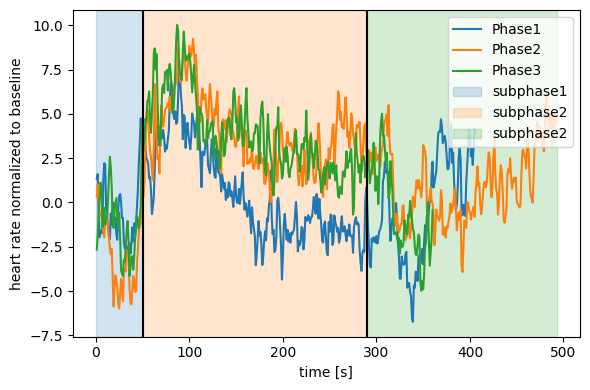

In [18]:
# run cell to visualize the data
fig, ax = plt.subplots(figsize=(6, 4))
data_hr["Phase1"].mean(axis=1).plot(ax=ax, label="Phase1")
data_hr["Phase2"].mean(axis=1).plot(ax=ax, label="Phase2")
data_hr["Phase3"].mean(axis=1).plot(ax=ax, label="Phase3")
ax.axvline(50, color='k')
ax.axvline(290, color='k')
ax.axvspan(0, 49, alpha=0.2, color='tab:blue', label="subphase1")
ax.axvspan(50, 289, alpha=0.2, color='tab:orange', label="subphase2")
ax.axvspan(290, 493, alpha=0.2, color='tab:green', label="subphase2")
ax.set_xlabel("time [s]")
ax.set_ylabel("heart rate normalized to baseline")
ax.legend()
fig.tight_layout()

##### 2.1 Since an error occurred in the heart rate recording for some participants, we need to drop their recordings from our data. Therefore, create a function called ``drop_cols`` which takes the parameters ``data`` and ``cols``:
* ``data``: ``pandas.DataFrame`` containing the column-wise heart rate data from all the participants
* ``cols``: list of participant names to be dropped
* The function should return a ``pandas.DataFrame`` containing all the participants' data except for the ones mentioned in ``cols``

In [19]:
def drop_cols(data, cols):
    return data.drop(cols, axis=1)

In [20]:
# run tests to check your implementation
data_test = pd.DataFrame([[1, 2, 3], [4, 5, 6]], columns=["A", "B", "C"])
assert drop_cols(data_test, ["A"]).shape == (2, 2), "Check that you removed the in cols specified column"
assert list(drop_cols(data_test, ["A"]).columns) == ["B", "C"], "Check that you removed the in cols specified columns"
assert list(drop_cols(data_test, ["A", "C"]).columns) == ["B"], "Check that you can remove also multiple columns at the same time"

##### 2.2 Create a function ``calc_mean`` which takes the parameter ``data`` and calculates the column-wise mean:
* ``data``: column-wise heart rate data for all participants
* The function should return a ``pandas.DataFrame`` with the column-wise mean of ``data`` retaining its column names and with "heart_rate" as the index

**Hint**: Check out if the [pandas.DataFrame.agg](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html) function can help you to solve this task. Give the parameter "func" of pandas.DataFrame.agg as type list for easier usage afterwards.

In [21]:
def calc_mean(data):
    return pd.DataFrame(data.agg(['mean']).values, index=['heart_rate'], columns=data.columns)


In [22]:
# run tests to check your implementation
data_test = pd.DataFrame([[1, 2, 3], [4, 5, 6]], columns=["A", "B", "C"])
result = calc_mean(data_test)
assert type(result) == pd.DataFrame, "Check if the return value of calc_mean() is of type pd.DataFrame. You can for example replace mean with [mean] in pd.DataFrame.agg to achieve this."
assert list(result.index) == ["heart_rate"] and list(result.columns) == ["A", "B", "C"], "Check that you maintain the original structure and set the index correctly"
assert list(result.loc["heart_rate"]) == [2.5, 3.5, 4.5], "Check that you calculate the mean column-wise"

##### 2.3 Create a function ``create_multi_index`` with the parameters ``participants``, ``condition``, ``phase``, and ``subphase``, which generates the multi-index for the long-format dataframe:
* ``participants``: list of the participants included in the dataset
* ``condition``: list of the conditions the ``participants`` belong to (Intervention/Control)
* ``phase``: string of the name of the phase
* ``subphase``: string of the name of the subphase
* The function should return a ``pandas.MultiIndex``object with a multi-index tuple for every participant
    * every tuple should contain the information about the participant's name, condition, phase, and subphase
    * name the levels of the multi-index: participant, condition, phase, subphase

**Hint**: Check out if the [pandas.MultiIndex.from_arrays](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.from_arrays.html) function can help you with this task.

In [25]:
def create_multi_index(participants, condition, phase, subphase):
    levels = [participants, condition, [phase]*len(participants), [subphase]*len(participants)]
    return pd.MultiIndex.from_arrays(levels, names=['participant', 'condition', 'phase', 'subphase'])


In [26]:
# run tests to check your implementation
result = create_multi_index(["Vp01", "Vp02", "Vp03"], ["Intervention", "Control", "Control"], "Phase1", "Subphase1")
assert type(result) == pd.MultiIndex, "Ensure that you return an instance of type pandas.MultiIndex"
assert result.names == ["participant", "condition", "phase", "subphase"], "Ensure that you set the level names correctly"
assert result[0] == ("Vp01", "Intervention", "Phase1", "Subphase1"), "Ensure that all information are contained and in the right order"
assert result[1] == ("Vp02", "Control", "Phase1", "Subphase1"), "Ensure that all information are contained and in the right order"

##### 2.4 In this task, we put all the functions created together and generate a long-format data frame containing the mean heart rate of every participant in every phase/subphase. To do so:
* Create an empty ``pandas.DataFrame`` called ``data_all``, which in the end should contain the data from all phases and subphases
* Loop over all the phases (1, 2, 3)
    * Create a ``pandas.DataFrame`` called ``data`` which contains only the heart rate data of one phase of ``data_hr`` (Check out how ``data_hr`` is built)
    * Remove the participants specified in ``drop_participants`` from ``data`` using ``drop_cols()``
    * Loop over all the subphases (1, 2, 3)
        * Slice ``data`` into the current subphase using the respective start and stop values specified in ``subphases`` and store it in the variable ``data_sub``
        * calculate the mean heart rate of ``data_sub`` for every participant individually using ``calc_mean()`` and store it in ``data_mean``
        * Generate the multi-index ``index`` using ``create_multi_index()``. Access the conditions of all participants from ``data_condition`` (defined in the beginning of the task).
        * Set the column index of ``data_mean`` to ``index``
        * [Transpose](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html) ``data_mean`` and concatenate ``data_mean`` to ``data_all``
* After calculating the mean for every phase and subphase, use [pandas.DataFrame.sort_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html) to sort ``data_all``
* Display ``data_all``

In [45]:
subphases = {
    "Subphase1": {"start": 0, "stop": 49},
    "Subphase2": {"start": 50, "stop": 289},
    "Subphase3": {"start": 290, "stop": -1}
}
drop_participants = ["Vp07", "Vp22"]


# Create an empty DataFrame to store the data from all phases/subphases
data_all = pd.DataFrame()




In [46]:
# run tests to check your implementation
assert data_all.index.names == ["participant", "condition", "phase", "subphase"] and list(data_all.columns) == ["heart_rate"], "Ensure that you used create_multi_index()"
assert data_all.index[3] == ("Vp01", "Intervention", "Phase2", "Subphase1"), "Ensure that you sort the dataframe"
assert len(set(list(data_all.index.get_level_values(0)))) == 26, "Ensure that you remove the specified 2 participants"
assert set(list(data_all.index.get_level_values(2))) == {"Phase1", "Phase2", "Phase3"}, "Ensure that you concatenate the data for all phases"
assert set(list(data_all.index.get_level_values(3))) == {"Subphase1", "Subphase2", "Subphase3"}, "Ensure that you concatenate the data for all subphases"
assert data_all.shape == (234, 1), "Ensure that store the data for all selected participants, phases, subphases"

AssertionError: ignored

##### 2.5 Create a function called ``calc_mean_grouped`` with the parameters ``data`` and ``levels``, which calculates the mean of ``data`` for the different groups specified by ``levels``:
* ``data``: long-format data frame containing the heart rates for every participant in every phase and subphase
* ``levels``: list of index level names indicating how to group the data
* The function should return a ``pandas.DataFrame`` with all the grouped means

Example: In the case of ``data`` being ``data_all`` and ``levels`` being ``["phase", "subphase"]``, ``calc_mean_grouped()`` should return the mean over all participants for every phase - subphase combination, i. e. for Phase1 - Subphase1, Phase1 - Subphase 2, ... resulting in 9 different values.

**Hint**: Check out if the [pandas.DataFrame.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function can help you with this task.

In [47]:
def calc_mean_grouped(data, levels):
    return data.groupby(levels).mean()


In [48]:
# run tests to check your implementation
data_test = pd.DataFrame(np.array([1, 2, 3, 4, 5, 6, 7, 8]).T)
data_test.index = pd.MultiIndex.from_product([["V1", "V2"], ["p1", "p2"], ["sp1", "sp2"]], names=["V", "P", "SP"])
result = calc_mean_grouped(data_test, ["P"])
assert list(result.index) == ["p1", "p2"], "Ensure that your grouping works correctly"
assert list(result[0]) == [3.5, 5.5], "Ensure that you take the mean correctly"
result = calc_mean_grouped(data_test, ["P", "SP"])
assert list(result.index) == [("p1", "sp1"), ("p1", "sp2"), ("p2", "sp1"), ("p2", "sp2")], "Ensure that your grouping works correctly"
assert list(result[0]) == [3.0, 4.0, 5.0, 6.0], "Ensure that you take the mean correctly"

KeyError: ignored

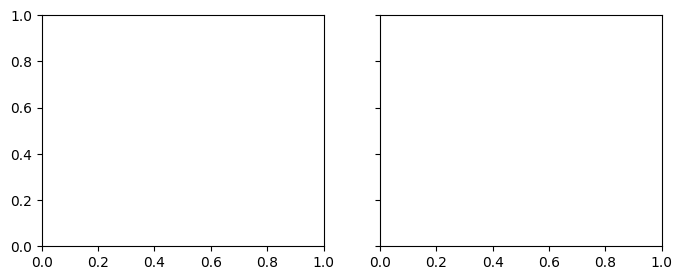

In [49]:
# run cell to visualize the results
fig, axs = plt.subplots(ncols=2, figsize=(8, 3), sharey=True)
labels = ['-'.join(map(str,x)) for x in product(["P1", "P2", "P3"], ["SP1", "SP2", "SP3"])]
data_mean = calc_mean_grouped(data_all, ["phase", "subphase"])
axs[0].plot(data_mean.to_numpy(), label="both conditions", marker='o')
axs[0].legend()
axs[0].set_ylabel("normalized mean heart rate")
axs[0].set_xticks(range(9))
axs[0].set_xticklabels(labels, rotation=45)

data_mean = calc_mean_grouped(data_all, ["condition", "phase", "subphase"])
axs[1].plot(data_mean.xs("Intervention", level="condition").to_numpy(), label="intervention", marker='o')
axs[1].plot(data_mean.xs("Control", level="condition").to_numpy(), label="control", marker='o')
axs[1].legend()
axs[1].set_xticks(range(9))
axs[1].set_xticklabels(labels, rotation=45)
fig.tight_layout()